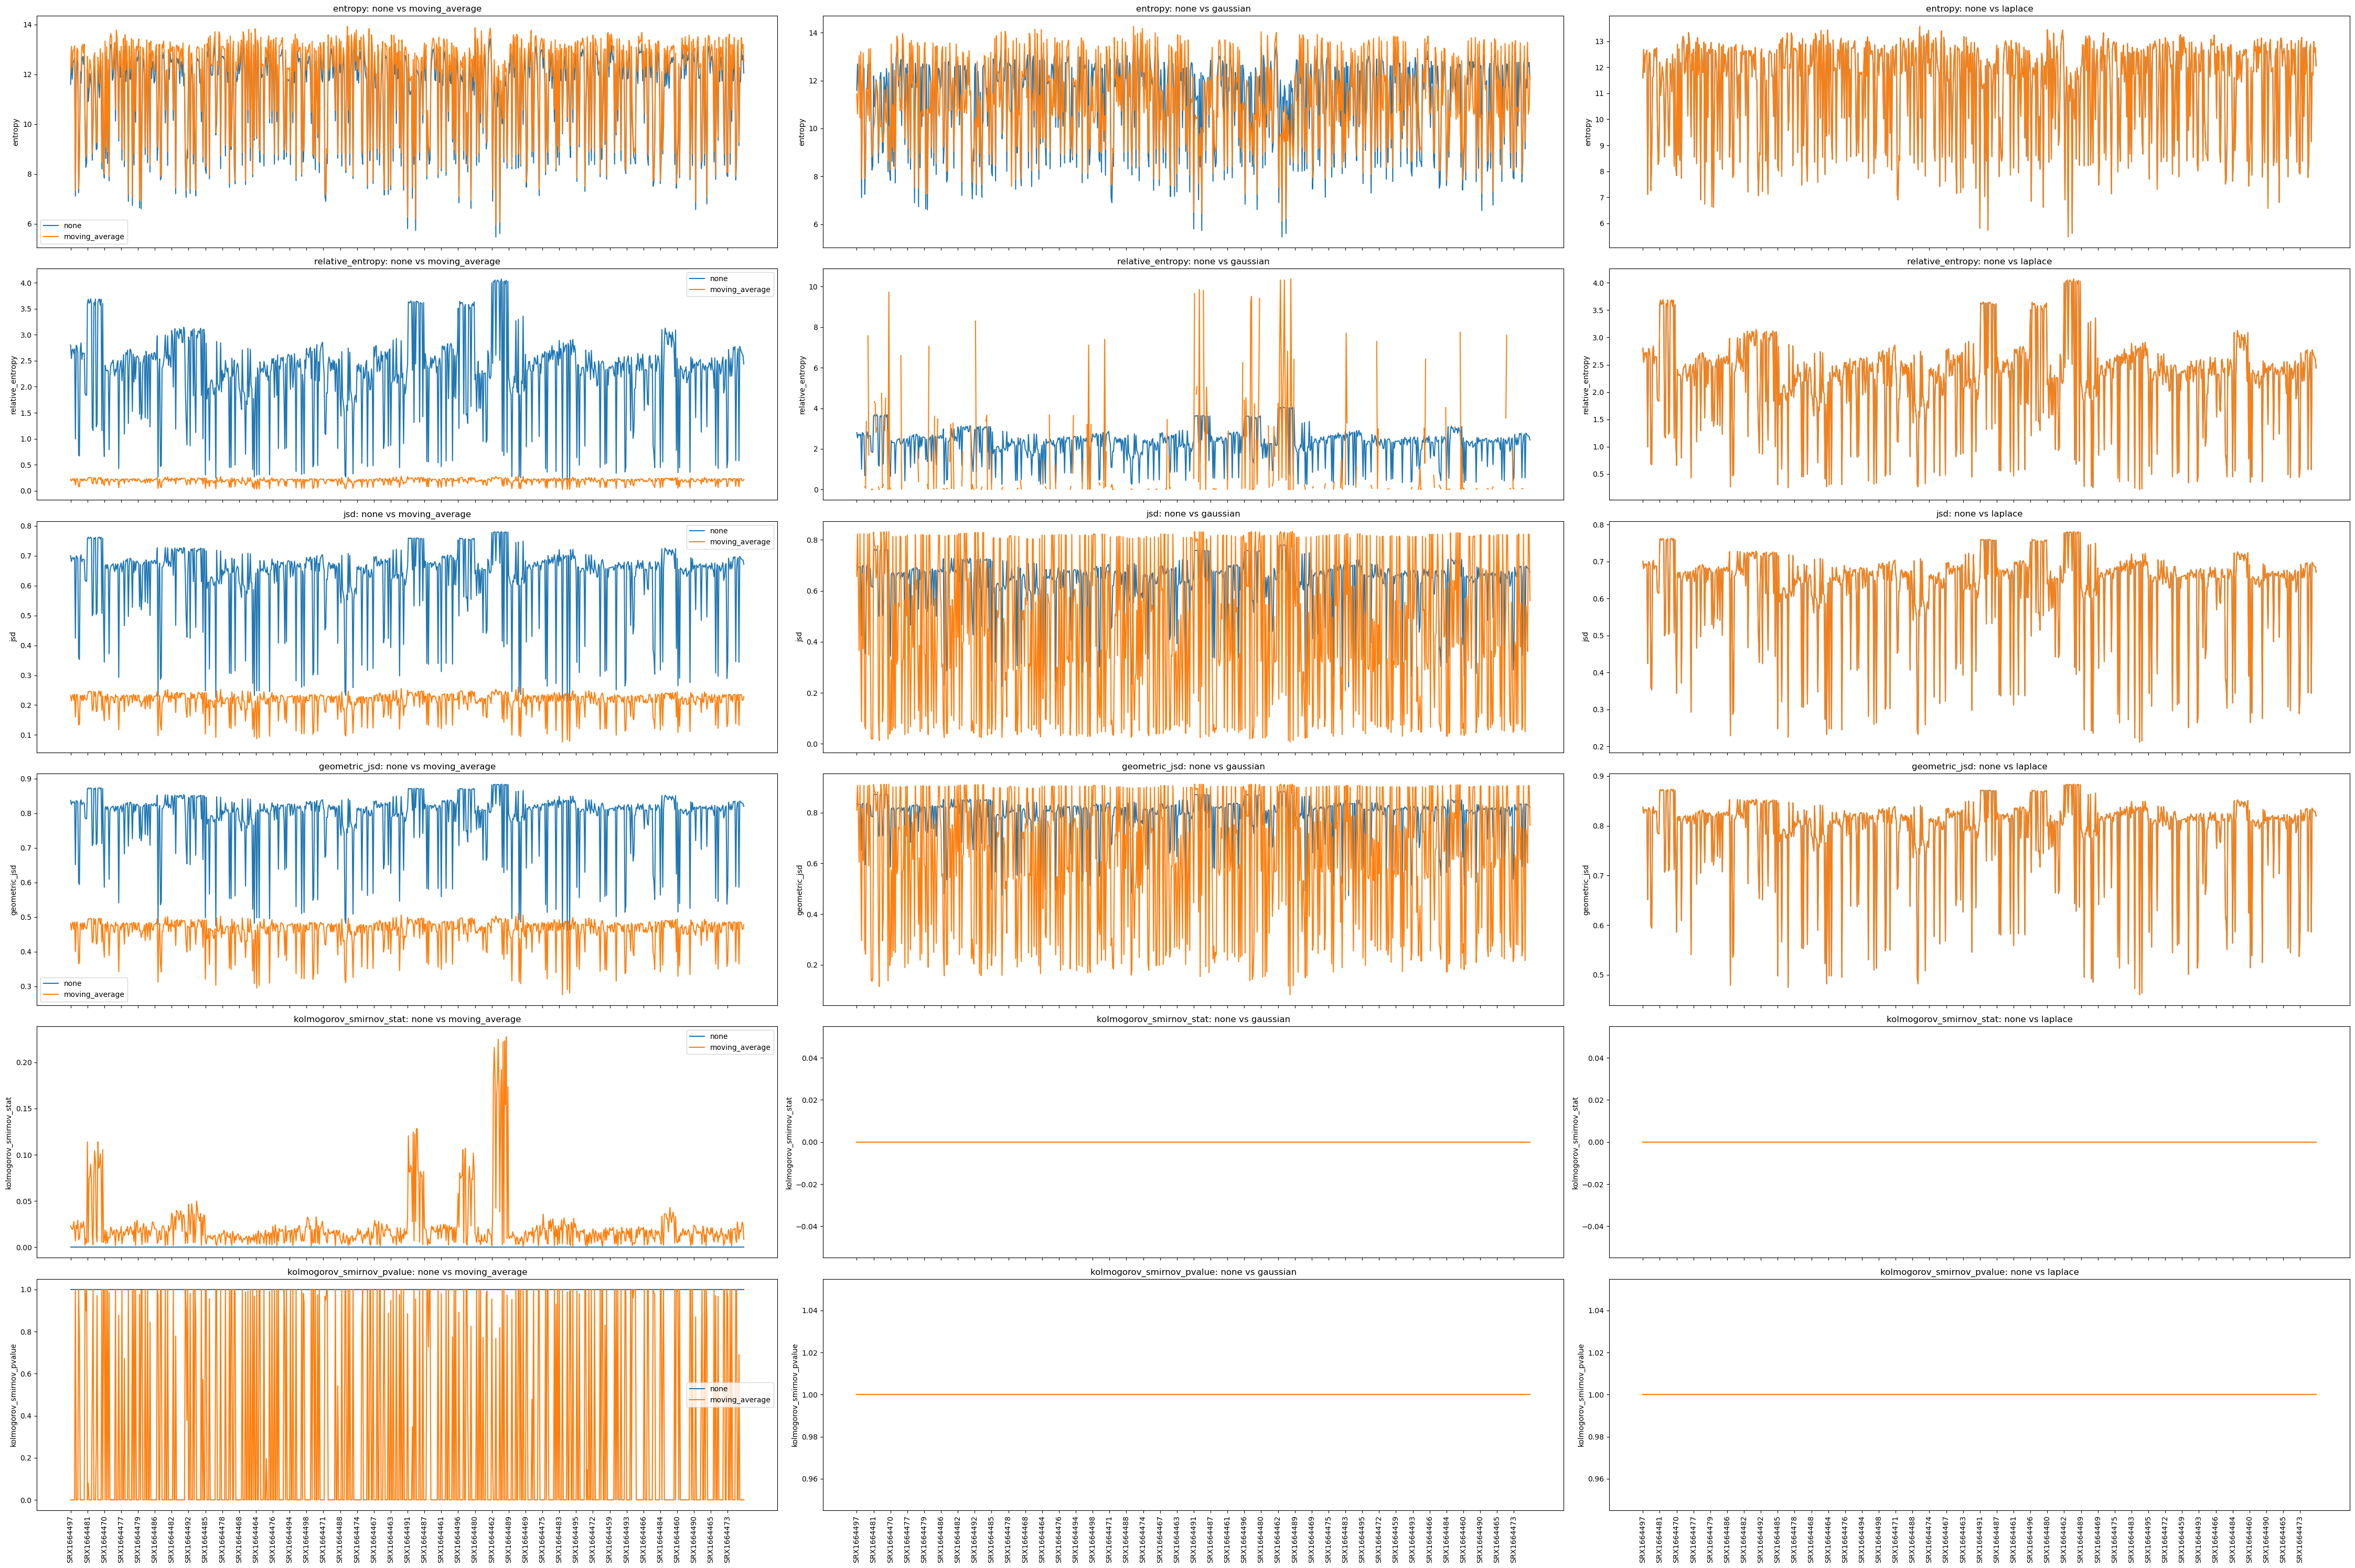

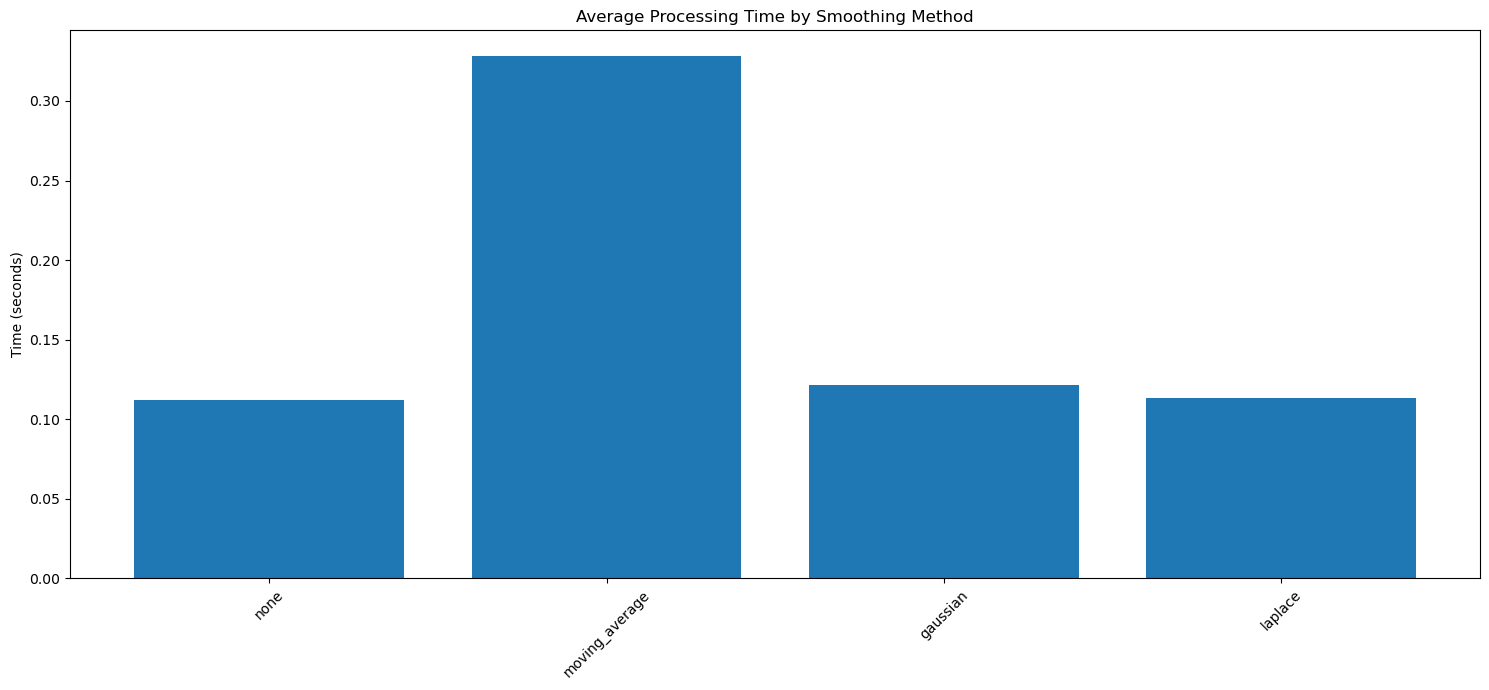

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

def read_results_from_csv(results_file):
    results_df = pd.read_csv(results_file)
    return results_df

# Extract sample number from file name
def extract_sample_number(file_name):
    parts = file_name.split('_')
    return parts[1] if len(parts) > 1 else file_name

def plot_divergence_subplots(results_df):
    metrics = ['entropy', 'relative_entropy', 'jsd', 'geometric_jsd', 'kolmogorov_smirnov_stat', 'kolmogorov_smirnov_pvalue']
    methods = results_df['Unnamed: 1'].unique()
    files = results_df['Unnamed: 0'].unique()
    
    sample_numbers = [extract_sample_number(file) for file in files]

    divergence_data = {metric: {method: [] for method in methods} for metric in metrics}
    divergence_data_none = {metric: [] for metric in metrics}

    for file in files:
        none_result = results_df[(results_df['Unnamed: 0'] == file) & (results_df['Unnamed: 1'] == 'none')]
        if not none_result.empty:
            for metric in metrics:
                divergence_data_none[metric].append(none_result[metric].values[0])
            for method in methods:
                if method != 'none':
                    result = results_df[(results_df['Unnamed: 0'] == file) & (results_df['Unnamed: 1'] == method)]
                    if not result.empty:
                        for metric in metrics:
                            divergence_data[metric][method].append(result[metric].values[0])

    x = np.arange(len(files))
    
    num_subplots = len(methods) - 1
    fig, axs = plt.subplots(len(metrics), num_subplots, figsize=(15 * num_subplots, 5 * len(metrics)), sharex=True)  

    for i, metric in enumerate(metrics):
        subplot_index = 0
        for method in methods:
            if method != 'none':
                ax = axs[i, subplot_index] if len(metrics) > 1 else axs[subplot_index]
                ax.plot(x, divergence_data_none[metric], label='none')
                ax.plot(x, divergence_data[metric][method], label=method)
                ax.set_title(f'{metric}: none vs {method}')
                ax.set_ylabel(metric)
                if i == len(metrics) - 1:
                    #ax.set_xticks(x)
                    #ax.set_xticklabels(sample_numbers, rotation=90)

                    ax.set_xticks(x[::max(1, len(x)//40)])  
                    ax.set_xticklabels(sample_numbers[::max(1, len(x)//40)], rotation=90)  
                if subplot_index == 0:
                    ax.legend()
                subplot_index += 1

    plt.tight_layout()
    plt.show()

# Function to plot processing times
def plot_processing_times(times_df):
    fig, ax = plt.subplots(figsize=(15, 7))
    avg_times = times_df.mean()
    ax.bar(avg_times.index, avg_times.values)
    ax.set_title('Average Processing Time by Smoothing Method')
    ax.set_ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

results_file = '/home/eharpu/methylation_analysis/smoothing /DiffSmoothingCompareWithTests/zip files/results.csv' 
times_file = '/home/eharpu/methylation_analysis/smoothing /DiffSmoothingCompareWithTests/zip files/times.csv'

results_df = read_results_from_csv(results_file)
times_df = pd.read_csv(times_file, index_col=0)

plot_divergence_subplots(results_df)

plot_processing_times(times_df)


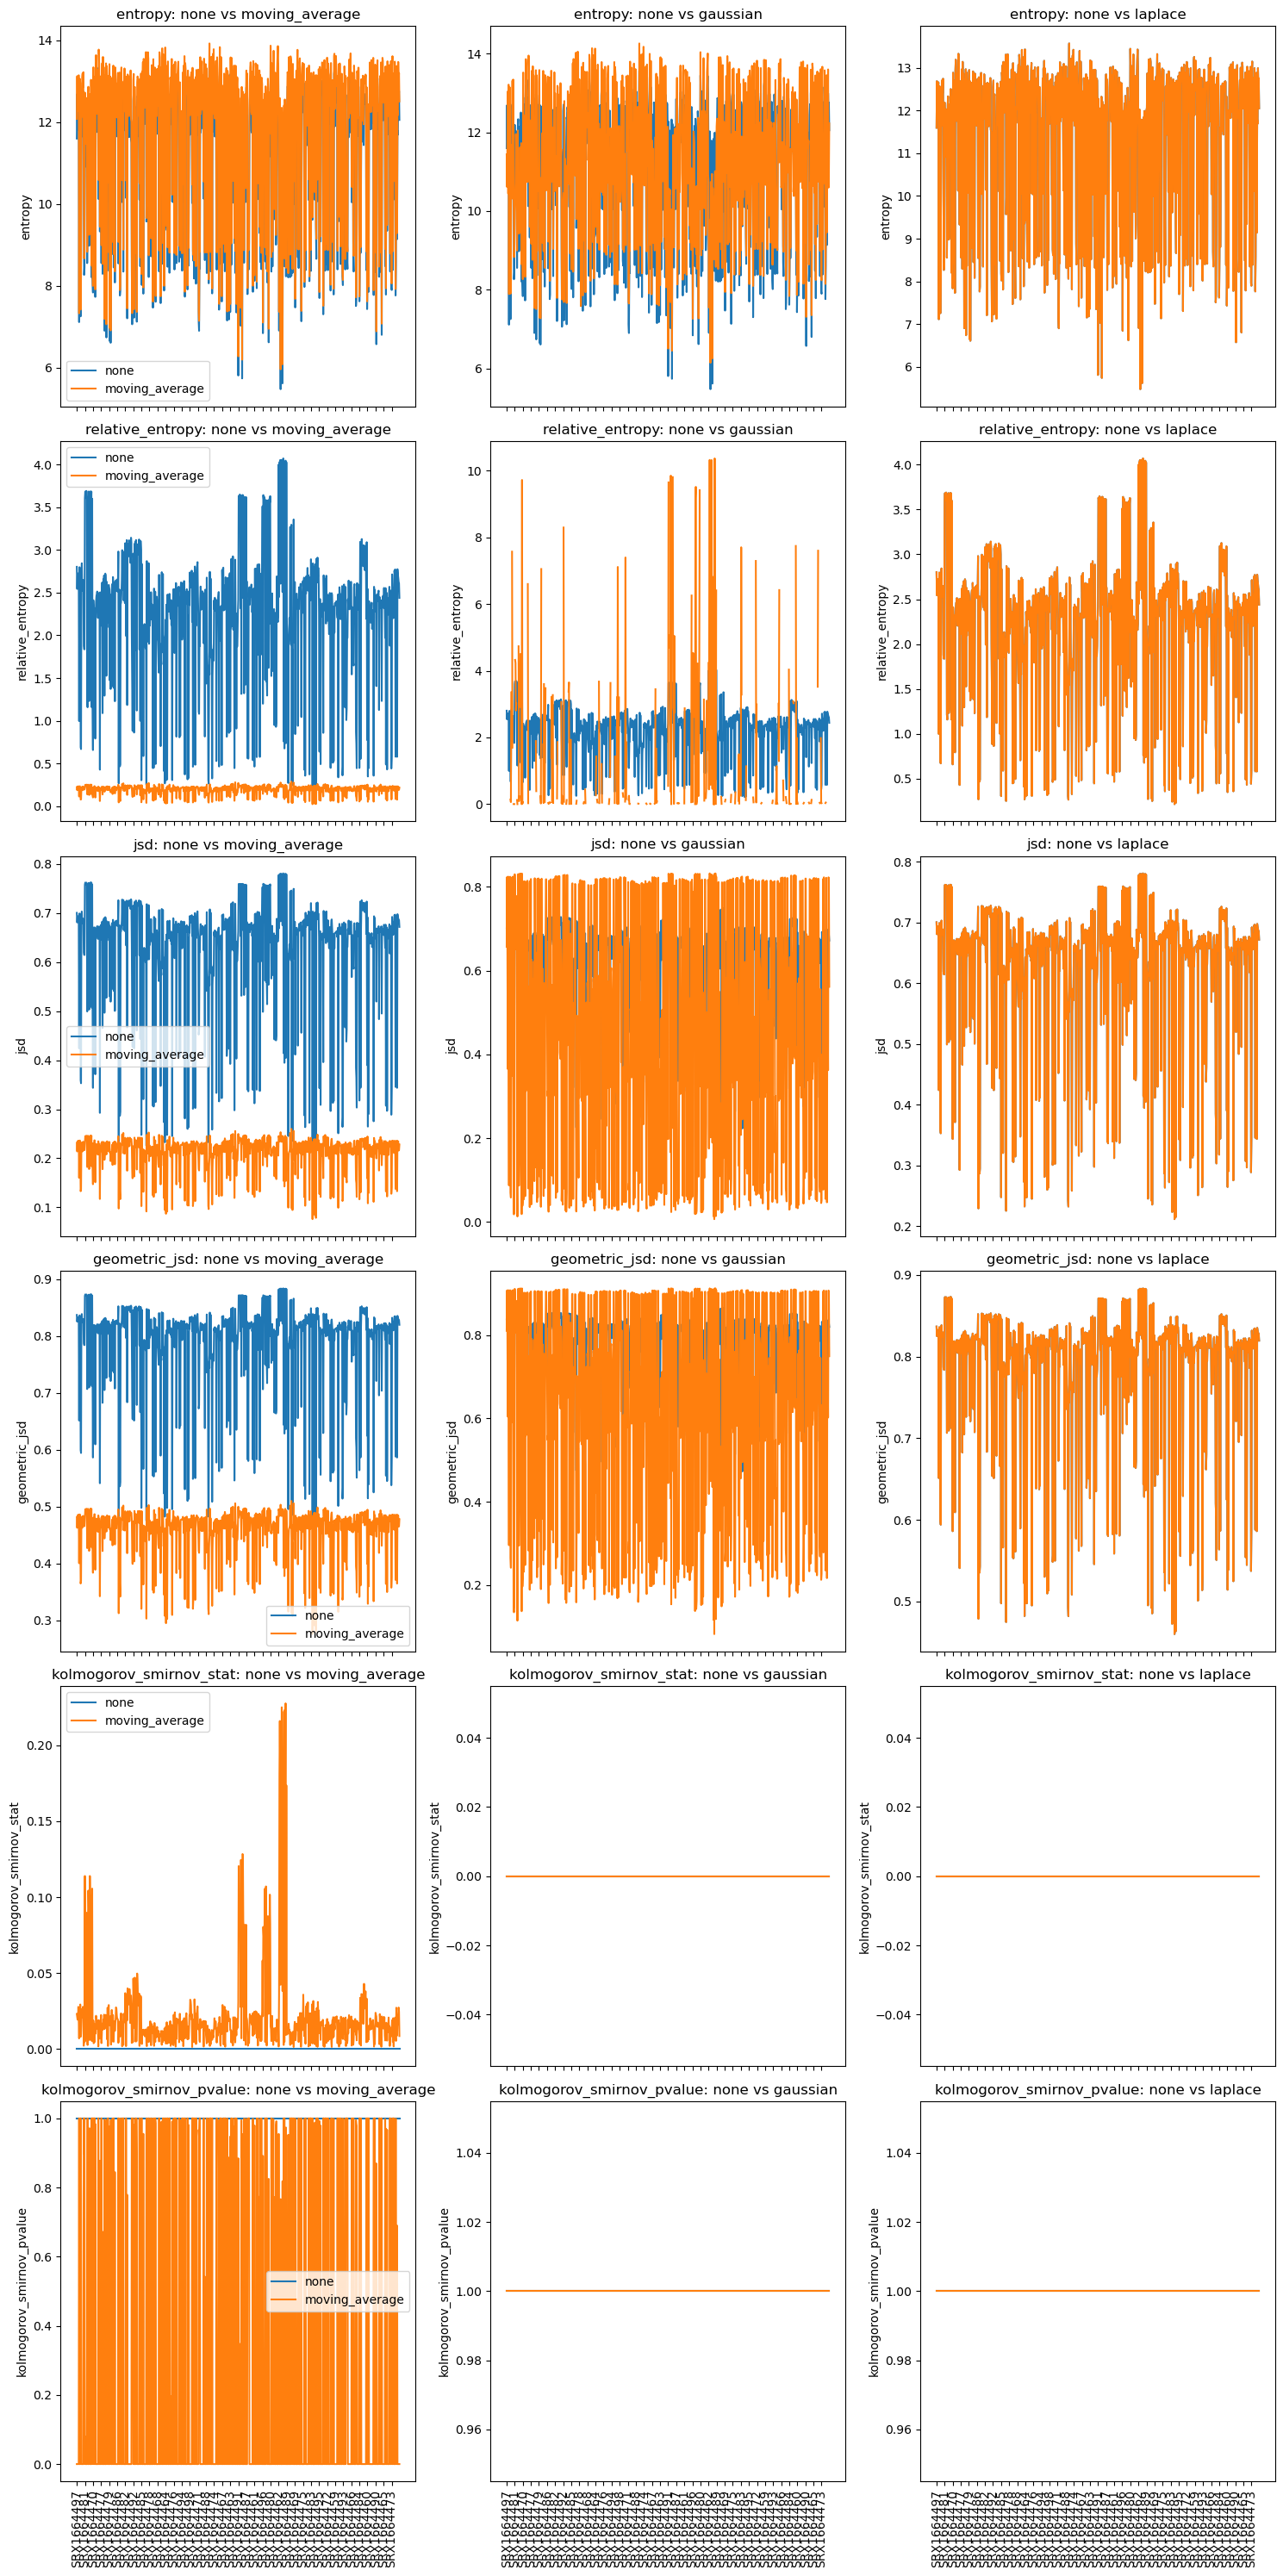

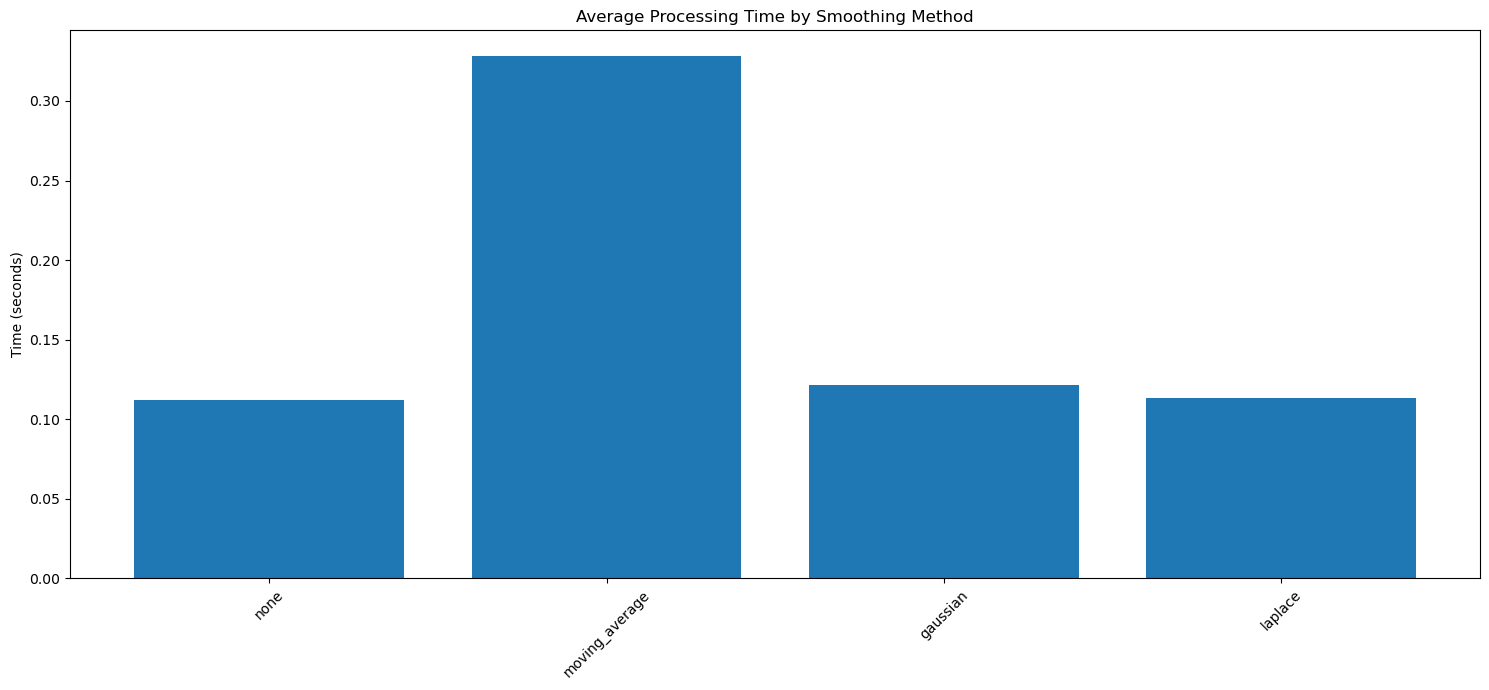

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

def read_results_from_csv(results_file):
    results_df = pd.read_csv(results_file)
    return results_df

# Extract sample number from file name
def extract_sample_number(file_name):
    parts = file_name.split('_')
    return parts[1] if len(parts) > 1 else file_name

def plot_divergence_subplots(results_df):
    metrics = ['entropy', 'relative_entropy', 'jsd', 'geometric_jsd', 'kolmogorov_smirnov_stat', 'kolmogorov_smirnov_pvalue']
    methods = results_df['Unnamed: 1'].unique()
    files = results_df['Unnamed: 0'].unique()
    
    sample_numbers = [extract_sample_number(file) for file in files]

    divergence_data = {metric: {method: [] for method in methods} for metric in metrics}
    divergence_data_none = {metric: [] for metric in metrics}

    for file in files:
        none_result = results_df[(results_df['Unnamed: 0'] == file) & (results_df['Unnamed: 1'] == 'none')]
        if not none_result.empty:
            for metric in metrics:
                divergence_data_none[metric].append(none_result[metric].values[0])
            for method in methods:
                if method != 'none':
                    result = results_df[(results_df['Unnamed: 0'] == file) & (results_df['Unnamed: 1'] == method)]
                    if not result.empty:
                        for metric in metrics:
                            divergence_data[metric][method].append(result[metric].values[0])

    x = np.arange(len(files))
    
    num_subplots = len(methods) - 1
    fig, axs = plt.subplots(len(metrics), num_subplots, figsize=(15, 5 * len(metrics)), sharex=True)  

    for i, metric in enumerate(metrics):
        subplot_index = 0
        for method in methods:
            if method != 'none':
                ax = axs[i, subplot_index] if len(metrics) > 1 else axs[subplot_index]
                ax.plot(x, divergence_data_none[metric], label='none')
                ax.plot(x, divergence_data[metric][method], label=method)
                ax.set_title(f'{metric}: none vs {method}')
                ax.set_ylabel(metric)
                if i == len(metrics) - 1:
                    ax.set_xticks(x[::max(1, len(x)//40)])  
                    ax.set_xticklabels(sample_numbers[::max(1, len(x)//40)], rotation=90)  
                if subplot_index == 0:
                    ax.legend()
                subplot_index += 1

    plt.tight_layout()
    plt.show()

# Function to plot processing times
def plot_processing_times(times_df):
    fig, ax = plt.subplots(figsize=(15, 7))
    avg_times = times_df.mean()
    ax.bar(avg_times.index, avg_times.values)
    ax.set_title('Average Processing Time by Smoothing Method')
    ax.set_ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

results_file = '/home/eharpu/methylation_analysis/smoothing /DiffSmoothingCompareWithTests/zip files/results.csv' 
times_file = '/home/eharpu/methylation_analysis/smoothing /DiffSmoothingCompareWithTests/zip files/times.csv'

results_df = read_results_from_csv(results_file)
times_df = pd.read_csv(times_file, index_col=0)

plot_divergence_subplots(results_df)

plot_processing_times(times_df)
